<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_dimethylsulfide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimethylsulfid DMS (CH₃)₂S and Dimethyldisulfid DMDS (CH₃S)₂**

🌱 Warum gelten **DMS** und **DMDS** als Biosignaturen?

**Dimethylsulfid (DMS, (CH₃)₂S)**:
- Wird hauptsächlich von **phytoplanktonischen Mikroorganismen** in den Ozeanen produziert.
- Entsteht beim Abbau von **Dimethylsulfoniopropionat (DMSP)**, einer Substanz, die von marinen Algen gebildet wird.
- Hat **keine bekannte geologische oder abiotische Quelle** in signifikanten Mengen in einer erdähnlichen Atmosphäre.
- Ein detektierbarer Anteil von DMS in einer Exoplanetenatmosphäre könnte also auf **biologische Aktivität** hindeuten.

**Dimethyldisulfid (DMDS, (CH₃S)₂)**:
- Ebenfalls ein Produkt mikrobieller Aktivität, entsteht bei **Zersetzungsprozessen von organischem Material**.
- Kommt auf der Erde z. B. bei **bakteriellem Abbau von Proteinen** vor.
- Auch hier sind **abiotische Produktionswege extrem unwahrscheinlich**.

<font color="blue">**Dimethylsulfid DMS (CH₃)₂S**

In [ ]:
!pip install pyscf geometric -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian, dft, tddft, mp, cc
from pyscf.geomopt.geometric_solver import optimize

In [ ]:
# Define molecule
mol = gto.Mole()
mol.atom = '''
    S   0.00000000   0.46519300   0.00000000
    C  -1.50853500  -0.34759700   0.00000000
    H  -1.48831900  -1.00619800   0.87783900
    H  -1.48831900  -1.00619800  -0.87783900
    H  -2.45862400   0.18760200   0.00000000
    C   1.50853500  -0.34759700   0.00000000
    H   1.48831900  -1.00619800   0.87783900
    H   2.45862400   0.18760200   0.00000000
    H   1.48831900  -1.00619800  -0.87783900
'''

# Name
molecule = 'Dimethyl Sulfide (DMS) (CH₃)₂S'

In [ ]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.symmetry = True
mol.spin = 0          # All 20 valence electrons are paired. It is a closed-shell singlet molecule
mol.build()

In [ ]:
print("-" * 20)
print(f"{molecule} molecule symmetry:")
print(f" Top group: {mol.topgroup}")
print(f" Group name: {mol.groupname}")
print("-" * 20)

--------------------
Dimethyl Sulfide (DMS) (CH₃)₂S molecule symmetry:
 Top group: C2v
 Group name: C2v
--------------------


Point Group Symmetry
* **Shape:** Bent geometry at the sulfur atom, with the two methyl groups attached. The methyl groups themselves have local symmetry, but their orientation affects the overall molecule.
* **Symmetry Operations:** A two-fold rotation axis ($C_2$) that bisects the C-S-C angle. It has two vertical mirror planes ($\sigma_v$); one is the plane containing the C-S-C atoms, and the other is perpendicular to it.
* **Point Group:** **$C_{2v}$**

In [ ]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -476.702530696431


np.float64(-476.70253069643064)

converged SCF energy = -476.702530696431


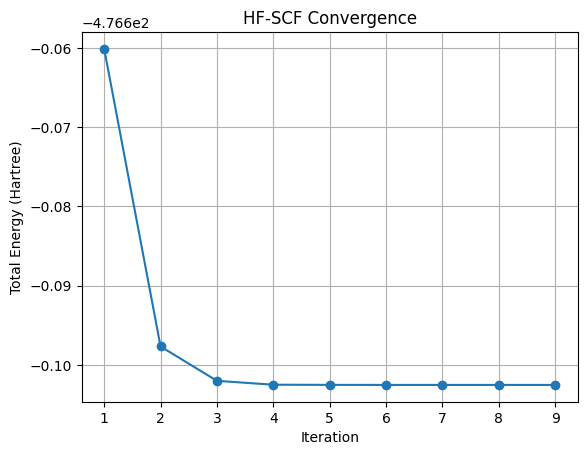

Ground state energy for Dimethyl Sulfide (DMS) (CH₃)₂S: -476.70253069643064 Hartree


In [ ]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [ ]:
# Ground State Energy with DFT (Kohn-Sham)
mf = dft.RKS(mol)
mf.xc = 'B3LYP'    # Exchange-correlation functional
mf.kernel()

converged SCF energy = -477.977564068562


np.float64(-477.977564068562)

In [ ]:
# Ground State Energy with Møller-Plesset Perturbation Theory (Post Hartree Fock)
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -476.702530696429
E(MP2) = -477.146862733467  E_corr = -0.444332037037904
E(SCS-MP2) = -477.146398856379  E_corr = -0.443868159949699
MP2 energy: -0.444332037037904 Hartree


In [ ]:
# Ground State Energy with Coupled Cluster (Post Hartree Fock)
mf = scf.RHF(mol)                  # Perform a HF-SCF calculation to obtain the reference wavefunction
hf_energy = mf.kernel()
ccsd_calc = cc.CCSD(mf)            # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
#print(f"HF-SCF energy: {hf_energy} Hartree")
#print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -476.702530696431
E(CCSD) = -477.191694291306  E_corr = -0.4891635948749799
CCSD(T) correction = -0.0134882468760234


In [ ]:
# Excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -40.1987085424813
Excited State energies (eV)
[12.72394509 12.72394509 12.72394509]

** Singlet excitation energies and oscillator strengths **
Excited State   1:   B1     12.72395 eV     97.44 nm  f=0.3932
Excited State   2:   B2     12.72395 eV     97.44 nm  f=0.3932
Excited State   3:   B3     12.72395 eV     97.44 nm  f=0.3932


In [ ]:
# Geometry Optimization (in Angstroms) with HF or DFT
# Take molecule including basis set defined from `mol.build()`
mf = dft.RKS(mol)     # Perform geometry optimization using DFT (Restricted Kohn-Sham)
mf.xc = 'b3lyp'       # Define the exchange-correlation functional
mol_eq = optimize(mf)
print(mol_eq.atom_coords())

converged SCF energy = -476.702530696428


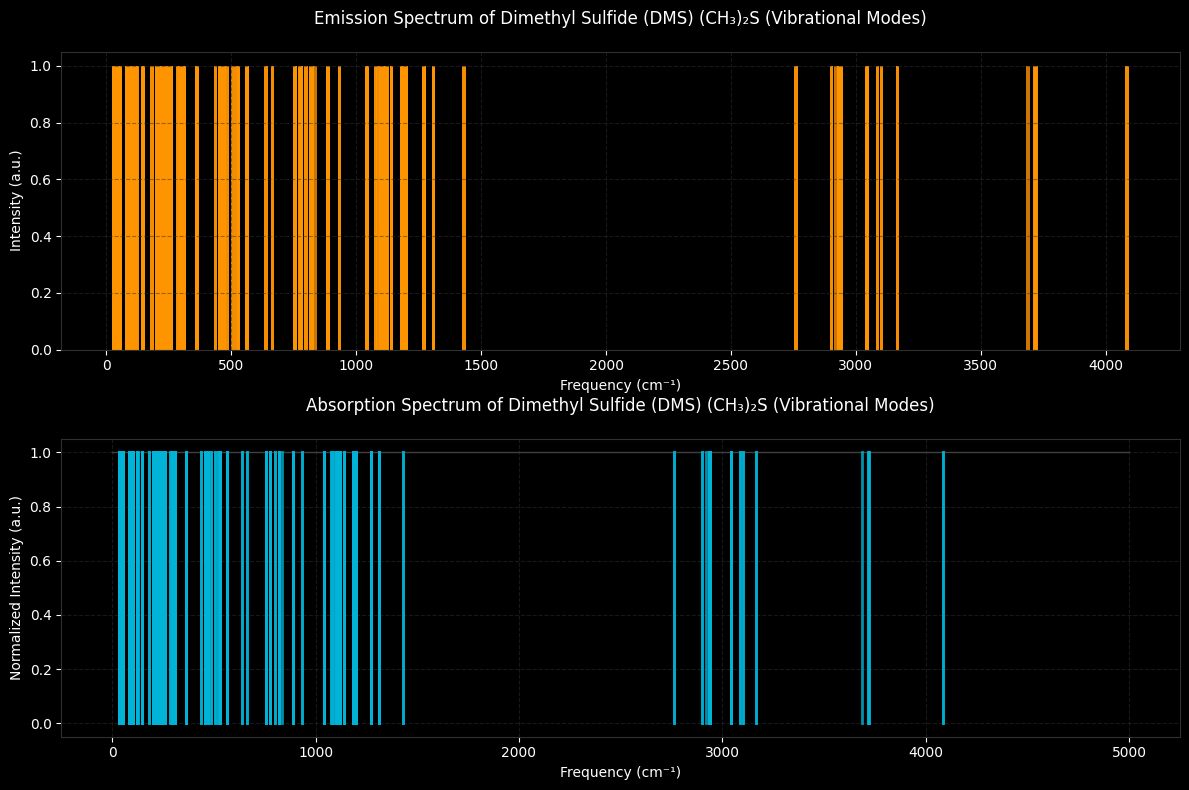

In [ ]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)

mf = scf.RHF(mol)                                     # Perform a ground-state calculation for molecular vibrational frequencies
mf.kernel()
hess = hessian.RHF(mf).kernel()                       # Calculate the Hessian matrix (force constants)
frequencies = np.linalg.eigvalsh(hess)                # Diagonalize the Hessian to get vibrational frequencies
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Filter out non-physical (imaginary) frequencies and limit to realistic range

# Plot stlyes
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid
plt.figure(figsize=(12, 8), facecolor='black') # Create figure with dark background
plt.style.use('dark_background') # Set the style to dark background

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Emission Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Absorption Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()

<font color="blue">**Dimethyldisulfid DMDS (CH₃S)₂**

In [ ]:
# Define molecule
mol = gto.Mole()
mol.atom = '''
    C  -1.579679   0.849405  -0.177006
    H  -1.516541   1.264210   0.829033
    H  -2.529898   0.315926  -0.297427
    H  -1.554032   1.528773  -1.031526
    S  -0.288210  -0.528464  -0.126027
    S   0.887210   0.334360   0.941620
    C   2.276901  -0.755146   0.505299
    H   2.331268  -1.526279   1.272183
    H   3.176472  -0.144865   0.413156
    H   2.199446  -1.196144  -0.487140
'''

# Name
molecule = 'Dimethyl Disulfide (DMDS) (CH₃S)₂'

In [ ]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.symmetry = True
mol.spin = 0          # All 26 valence electrons are paired. It is a closed-shell singlet molecule.
mol.build()

In [ ]:
print("-" * 20)
print(f"{molecule} molecule symmetry:")
print(f" Top group: {mol.topgroup}")
print(f" Group name: {mol.groupname}")
print("-" * 20)

--------------------
Dimethyl Disulfide (DMDS) (CH₃S)₂ molecule symmetry:
 Top group: C1
 Group name: C1
--------------------


Point Group Symmetry
* **Shape:** This molecule is not planar. It has a characteristic dihedral (gauche) angle between the two C-S-S planes, which is approximately 85-90 degrees.
* **Symmetry Operations:** The only symmetry element is a single two-fold rotation axis ($C_2$) that passes through the midpoint of the S-S bond and is perpendicular to it. There are no mirror planes or an inversion center.
* **Point Group:** **$C_2$**

In [ ]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -874.219711781327


np.float64(-874.2197117813272)

converged SCF energy = -874.219711781327


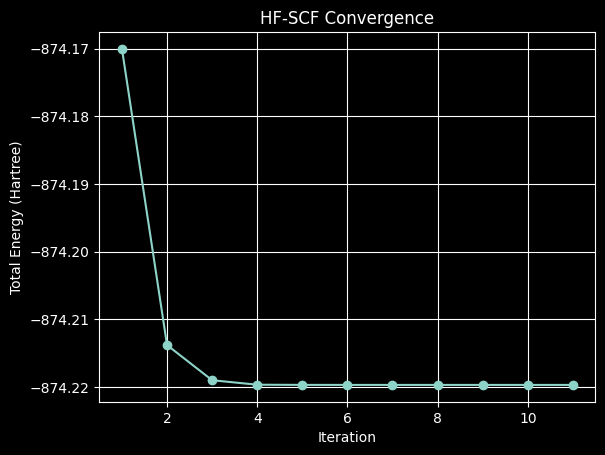

Ground state energy for Dimethyl Disulfide (DMDS) (CH₃S)₂: -874.2197117813267 Hartree


In [ ]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [ ]:
# Ground State Energy with DFT (Kohn-Sham)
mf = dft.RKS(mol)
mf.xc = 'B3LYP'    # Exchange-correlation functional
mf.kernel()

converged SCF energy = -876.173524101238


np.float64(-876.1735241012376)

In [ ]:
# Ground State Energy with Møller-Plesset Perturbation Theory (Post Hartree Fock)
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -874.21971178133
E(MP2) = -874.798366176227  E_corr = -0.578654394896887
E(SCS-MP2) = -874.792216334056  E_corr = -0.57250455272571
MP2 energy: -0.5786543948968866 Hartree


In [ ]:
# Ground State Energy with Coupled Cluster (Post Hartree Fock)
mf = scf.RHF(mol)                  # Perform a HF-SCF calculation to obtain the reference wavefunction
hf_energy = mf.kernel()
ccsd_calc = cc.CCSD(mf)            # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
#print(f"HF-SCF energy: {hf_energy} Hartree")
#print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -874.219711781327
E(CCSD) = -874.8508958261147  E_corr = -0.631184044787465
CCSD(T) correction = -0.0190826561037912


In [ ]:
# Excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -874.219711781326
Excited State energies (eV)
[4.62561245 5.76872945 7.11715856]

** Singlet excitation energies and oscillator strengths **
Excited State   1:    A      4.62561 eV    268.04 nm  f=0.0003
Excited State   2:    A      5.76873 eV    214.92 nm  f=0.0042
Excited State   3:    A      7.11716 eV    174.20 nm  f=0.0004


In [ ]:
# Geometry Optimization (in Angstroms) with HF or DFT
# Take molecule including basis set defined from `mol.build()`
mf = dft.RKS(mol)     # Perform geometry optimization using DFT (Restricted Kohn-Sham)
mf.xc = 'b3lyp'       # Define the exchange-correlation functional
mol_eq = optimize(mf)
print(mol_eq.atom_coords())

converged SCF energy = -874.219711781327


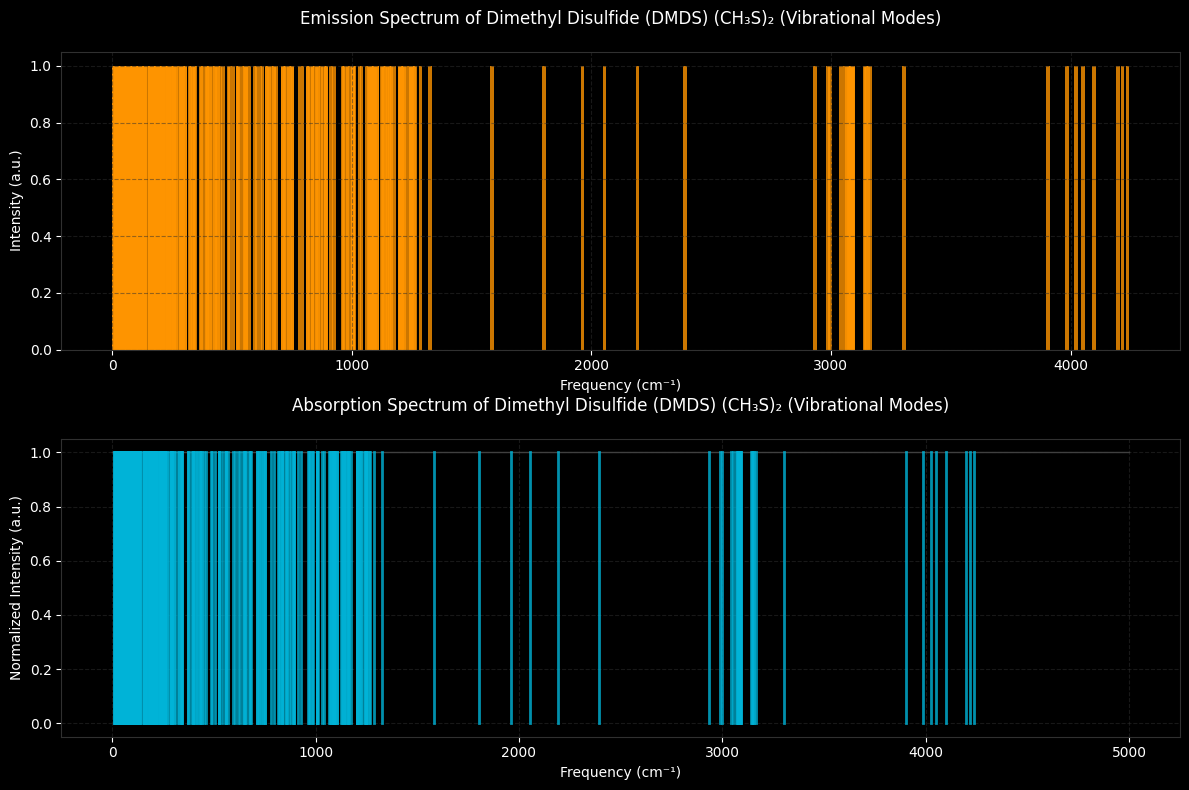

In [ ]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)

mf = scf.RHF(mol)                                     # Perform a ground-state calculation for molecular vibrational frequencies
mf.kernel()
hess = hessian.RHF(mf).kernel()                       # Calculate the Hessian matrix (force constants)
frequencies = np.linalg.eigvalsh(hess)                # Diagonalize the Hessian to get vibrational frequencies
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Filter out non-physical (imaginary) frequencies and limit to realistic range

# Plot stlyes
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid
plt.figure(figsize=(12, 8), facecolor='black') # Create figure with dark background
plt.style.use('dark_background') # Set the style to dark background

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Emission Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Absorption Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()